## Generators vs regular functions (or yield vs return) - basics

From python.org (https://docs.python.org/3/howto/functional.html):

__Generators__ are a special class of __functions__ that simplify the task of writing iterators.

__Regular__ functions compute a value and return it, but __generators__ return an __iterator__ that returns a stream of values.

An __iterator__ is an object representing a stream of data; this object returns the data one element at a time. 

Generators are also supported by other langues, for example C#: 
https://docs.microsoft.com/en-us/dotnet/csharp/language-reference/keywords/yield

## Iterators
A object that represent a stream of data. These can be used in a for in function. Here are some examples.

In [1]:
# list of values.
values = ['a', 2, 3, max(34, 234)]

# what for type does the list have?
print(type(values))

for value in values:
    print(value)

# tuples
coordinate = (1, 2, 3)
for value in coordinate:
    print(value)

<class 'list'>
a
2
3
234
1
2
3


In [2]:
# dictionaries
month_values = dict()

month_values['January'] = 1
month_values['February'] = 2
month_values['March'] = 3
# etc.

print('Iterate over keys:')

# iterate over the keys
for month_name in month_values:
    print(f'Month {month_name} has value {month_values[month_name]}')

print('Iterate over items:')
    
# items (key, value) pair
for k, v in month_values.items():
    print(f'Month {k} has value {v}')


Iterate over keys:
Month January has value 1
Month February has value 2
Month March has value 3
Iterate over items:
Month January has value 1
Month February has value 2
Month March has value 3



### Generator basics

In [3]:
def example_generator():
    # use yield instead of return to turn a function into a generator.
    yield 1
    # after the yield 1, the generator will continue here when it is called again.
    print('after the first yield')
    yield 2
    yield 30


In [4]:
# a generator function returns an object
g = example_generator()
print(g)

<generator object example_generator at 0x00000251E3A487C8>


In [5]:
# read out the first value
n = next(g)
print(n)

1


In [6]:
# continue
n = next(g)
print(n) # 2
n = next(g)
print(n) # 30


after the first yield
2
30


In [7]:
# what will happen when there are no more values?
n = next(g) # ?
print(n)

StopIteration: 

In [8]:
# normal use is in a for loop.
# a for loop iterates over the values that the generator returns.
for value in example_generator():
    print(value)

1
after the first yield
2
30


## Example - counting word lengths

In this example we want to write a function that counts the length of each word in a sentence and returns the length. The words are seperated by spaces.

In [9]:
# Define the example sentence
words = 'this is a sentence to test the word count functions'

### Count word lengths function with return

In [10]:
def count_word_lengths(sentence):
    # define a list for storing the length of each word
    word_lengths = list()
    
    for word in sentence.split():
        # Add each word length to the list
        word_lengths.append(len(word))
    return word_lengths


In [11]:
print(count_word_lengths(words))


[4, 2, 1, 8, 2, 4, 3, 4, 5, 9]


### Count word lengths function with a generator function

In [12]:
def count_word_lengths_yield(sentence):
    for word in sentence.split():
        # no intermediate storage needed. 
        # saves two statements. this also makes the intent of the function clearer.
        yield len(word)


When calling the function you get a generator instead of a list.

In [13]:
print(count_word_lengths_yield(words))

<generator object count_word_lengths_yield at 0x00000251E3B0CA98>


It is still possible to convert this to a list using the list() function.

In [14]:
print(list(count_word_lengths_yield(words)))

[4, 2, 1, 8, 2, 4, 3, 4, 5, 9]


### Using map to count word lengths

In this case you could also use the 'map' function. Map executes a function for each element of an iterator. Here the 'len' function is used to calculate the word length.

Note: Pandas has a 'map' method as well that can be called on a Pandas Series object (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html).

In [15]:
# this gives the same result as the previous examples.
print(list(map(len, words.split())))

[4, 2, 1, 8, 2, 4, 3, 4, 5, 9]


## Usage of word lengths
In this example the word lengths functions are used to count the words longer than the value of the max_length parameter.

In [16]:
def count_large_words(word_counter, sentence, max_length):
    cnt = 0
    
    # you can use the 'for .. in' for iterating over both lists and generators.
    for word_length in word_counter(sentence):
        if word_length > max_length:
            cnt += 1
    return cnt

In [17]:
# use the return version to count the word lengths

cnt = count_large_words(count_word_lengths, words, 4)
print(cnt)

3


In [18]:
# using the yield version gives the same result, but in the generator
# needs less storage.

cnt = count_large_words(count_word_lengths_yield, words, 4)
print(cnt)



3


### Infinite sequences

A generator can also be used to simulate an infinite sequence of values. For example prime numbers, random numbers etc. Below an example of random x,y coordinates.

In [19]:
import random

def rnd_coordinates(size_x, size_y):
        random.seed()
        
        while True:
            yield (random.randint(0, size_x - 1), random.randint(0, size_y - 1))


In [20]:
import itertools

# get 10 random coordinates.
for coord in itertools.islice(rnd_coordinates(50, 50), 10):
    print(coord)

(38, 0)
(33, 31)
(40, 10)
(27, 1)
(39, 18)
(19, 36)
(7, 45)
(7, 42)
(1, 25)
(31, 20)


Use this generator to draw an image and fill it with random pixels.

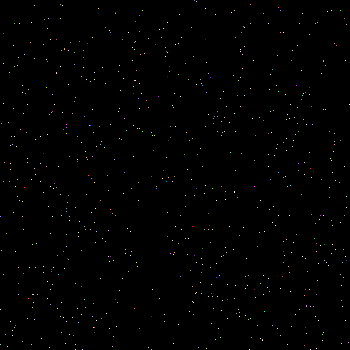

In [21]:
from PIL import Image

def rnd_color():
    return random.randint(0, 255), random.randint(0, 255), random.randint(0, 255), random.randint(0, 255) 

width = 350
height = 350

background = (0, 0, 0, 255)

image = Image.new("RGBA", (width, height), background)
pixels = image.load()


for coord in itertools.islice(rnd_coordinates(width, height), 750):
    pixels[coord] = rnd_color()

display(image)